In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

%matplotlib inline

In [2]:
!pip install xgboost

In [3]:
customer_data = pd.read_csv("marketing_campaign.csv", delimiter=";")
customer_data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [4]:
customer_data['Education'] = customer_data['Education'].astype('category').cat.codes
customer_data['Marital_Status'] = customer_data['Marital_Status'].astype('category').cat.codes
customer_data

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
0      5524        1957          2               4  58138.0        0   
1      2174        1954          2               4  46344.0        1   
2      4141        1965          2               5  71613.0        0   
3      6182        1984          2               5  26646.0        1   
4      5324        1981          4               3  58293.0        1   
...     ...         ...        ...             ...      ...      ...   
2235  10870        1967          2               3  61223.0        0   
2236   4001        1946          4               5  64014.0        2   
2237   7270        1981          2               2  56981.0        0   
2238   8235        1956          3               5  69245.0        0   
2239   9405        1954          4               3  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   int8   
 3   Marital_Status       2240 non-null   int8   
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
print(customer_data.isnull().sum())
customer_data.dropna(axis=0, inplace=True)
customer_data['Income'].isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


0

In [7]:
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'])
customer_data['Year_Customer'] = customer_data['Dt_Customer'].dt.year
customer_data['Month_Customer'] = customer_data['Dt_Customer'].dt.month
customer_data['Day_Customer'] = customer_data['Dt_Customer'].dt.day

customer_data.drop('Dt_Customer', axis=1, inplace=True)

In [8]:
X = customer_data.drop('Response', axis=1)
y = customer_data['Response']

model = RandomForestClassifier(n_estimators=100, random_state=42)

num_features_to_keep = 10  # Set the desired number of features to keep
rfe = RFE(model, n_features_to_select=num_features_to_keep)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features)

Selected Features: Index(['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntMeatProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumStorePurchases',
       'Day_Customer'],
      dtype='object')


In [9]:
custom_cdata = customer_data[selected_features].copy()

custom_cdata['Response'] = customer_data['Response']

X_selected = custom_cdata.drop('Response', axis=1)
y_selected = custom_cdata['Response']


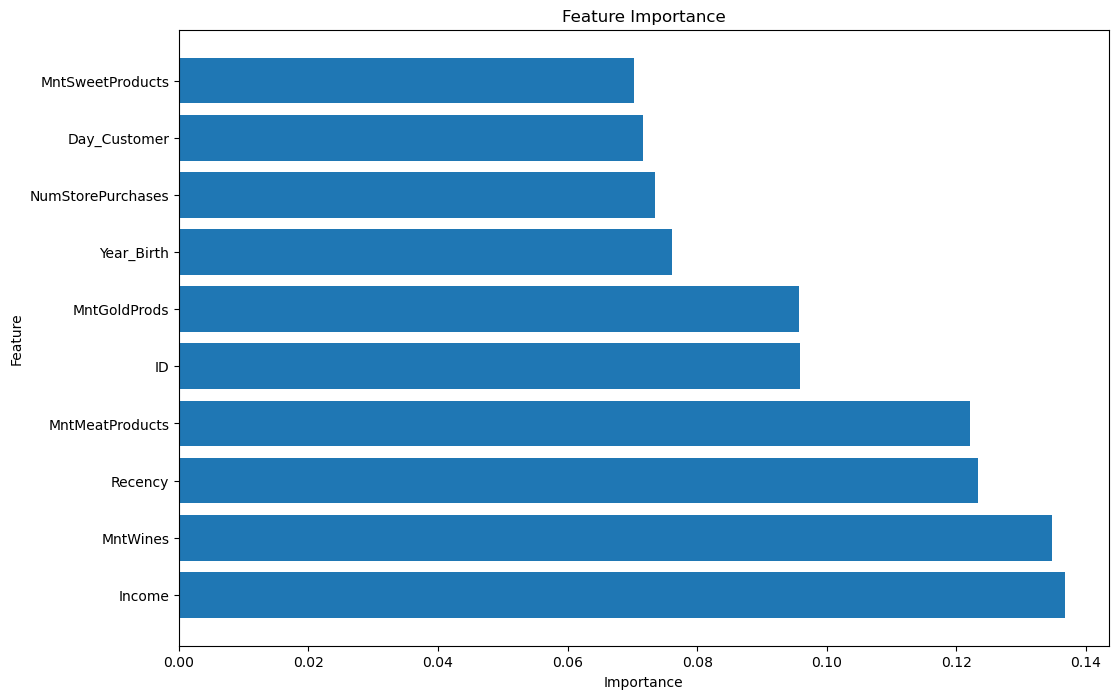

In [10]:
# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_selected, y_selected)

# Retrieve feature importance scores
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_selected.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [11]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Choose the number of folds for cross-validation
k = 5

# Initialize k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_selected, y_selected, cv=kf)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.86711712 0.84424379 0.84424379 0.86230248 0.87133183]
Mean CV Score: 0.8578478026559291


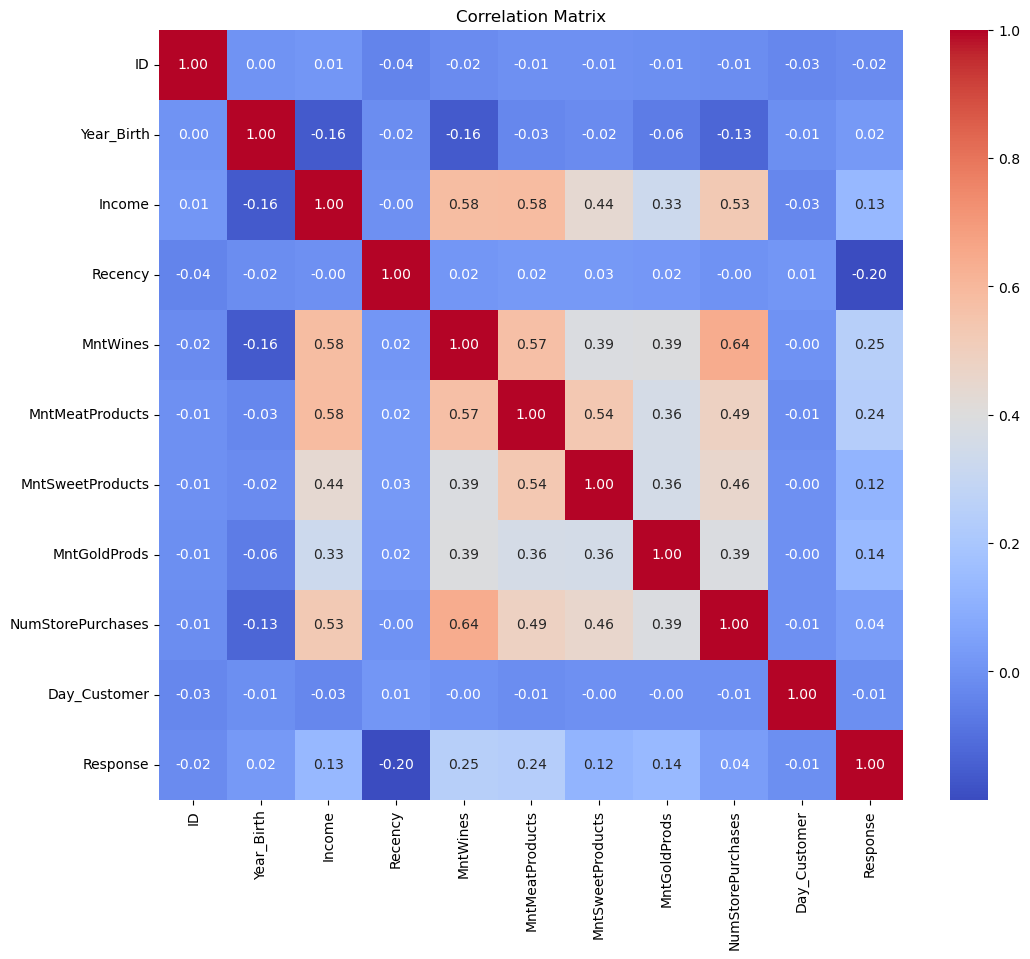

In [12]:
corr_matrix = custom_cdata.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

/Users/cristianchoco/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [16]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

models = {'Logistic Regression': lr_model, 'Random Forest': rf_model, 'SVM': svm_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    recall_scores = recall_score(y_test, y_pred)
    f1_scores = f1_score(y_test, y_pred)
    roc_auc_scores = roc_auc_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n")
    print(f"Recall:\n{recall_scores}\n")
    print(f"F1-score:\n{f1_scores}\n")
    print(f"ROC AUC Score:\n{roc_auc_scores}\n")
    print("\n")

Model: Logistic Regression
Accuracy: 0.8671
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       382
           1       0.57      0.19      0.29        62

    accuracy                           0.87       444
   macro avg       0.73      0.58      0.61       444
weighted avg       0.84      0.87      0.84       444


Recall:
0.1935483870967742

F1-score:
0.2891566265060241

ROC AUC Score:
0.5849940888363452



Model: Random Forest
Accuracy: 0.8694
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       382
           1       0.56      0.29      0.38        62

    accuracy                           0.87       444
   macro avg       0.73      0.63      0.65       444
weighted avg       0.85      0.87      0.85       444


Recall:
0.2903225806451613

F1-score:
0.3829787234042554

ROC AUC Score:
0.6268366829927378



Model: SVM
Accuracy: 0.867

In [17]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
}

In [18]:
xgb_model = XGBClassifier(random_state=42)

In [19]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best Hyperparameters (XGBoost):", best_params_xgb)
print("Best Score (XGBoost):", best_score_xgb)

Best Hyperparameters (XGBoost): {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
Best Score (XGBoost): 0.8561199968170605


In [20]:
best_xgb_model = XGBClassifier(**best_params_xgb, random_state=42)
best_xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

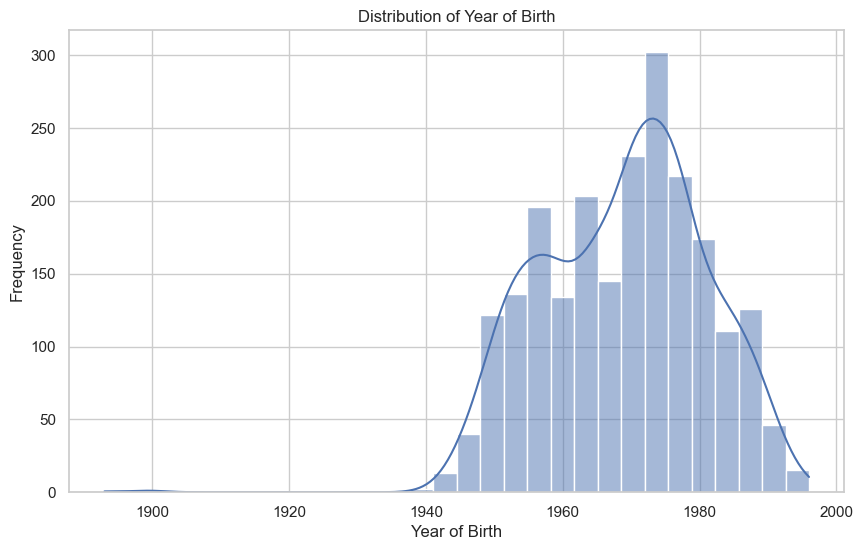

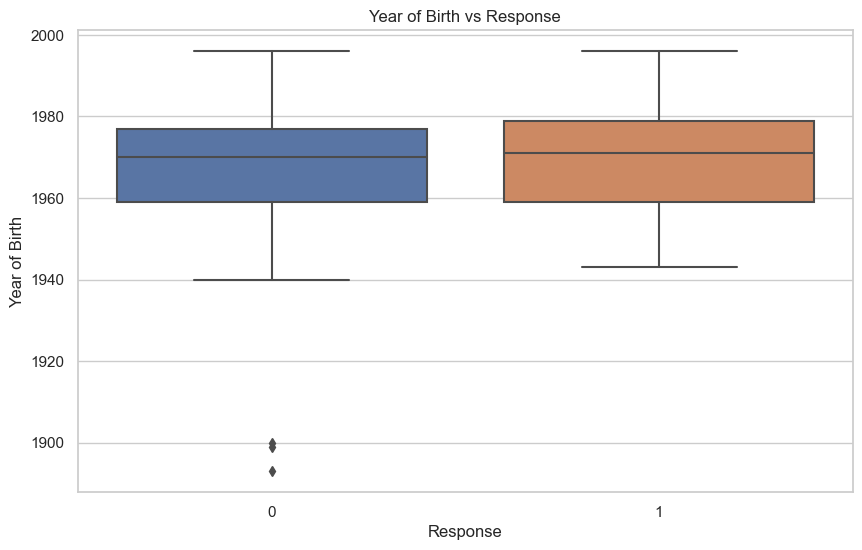

In [21]:
sns.set(style="whitegrid")

# Plot distribution of 'Year_Birth'
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_data, x='Year_Birth', bins=30, kde=True)
plt.title('Distribution of Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

# Box plot of 'Year_Birth' vs 'Response'
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_data, x='Response', y='Year_Birth')
plt.title('Year of Birth vs Response')
plt.xlabel('Response')
plt.ylabel('Year of Birth')
plt.show()

/Users/cristianchoco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


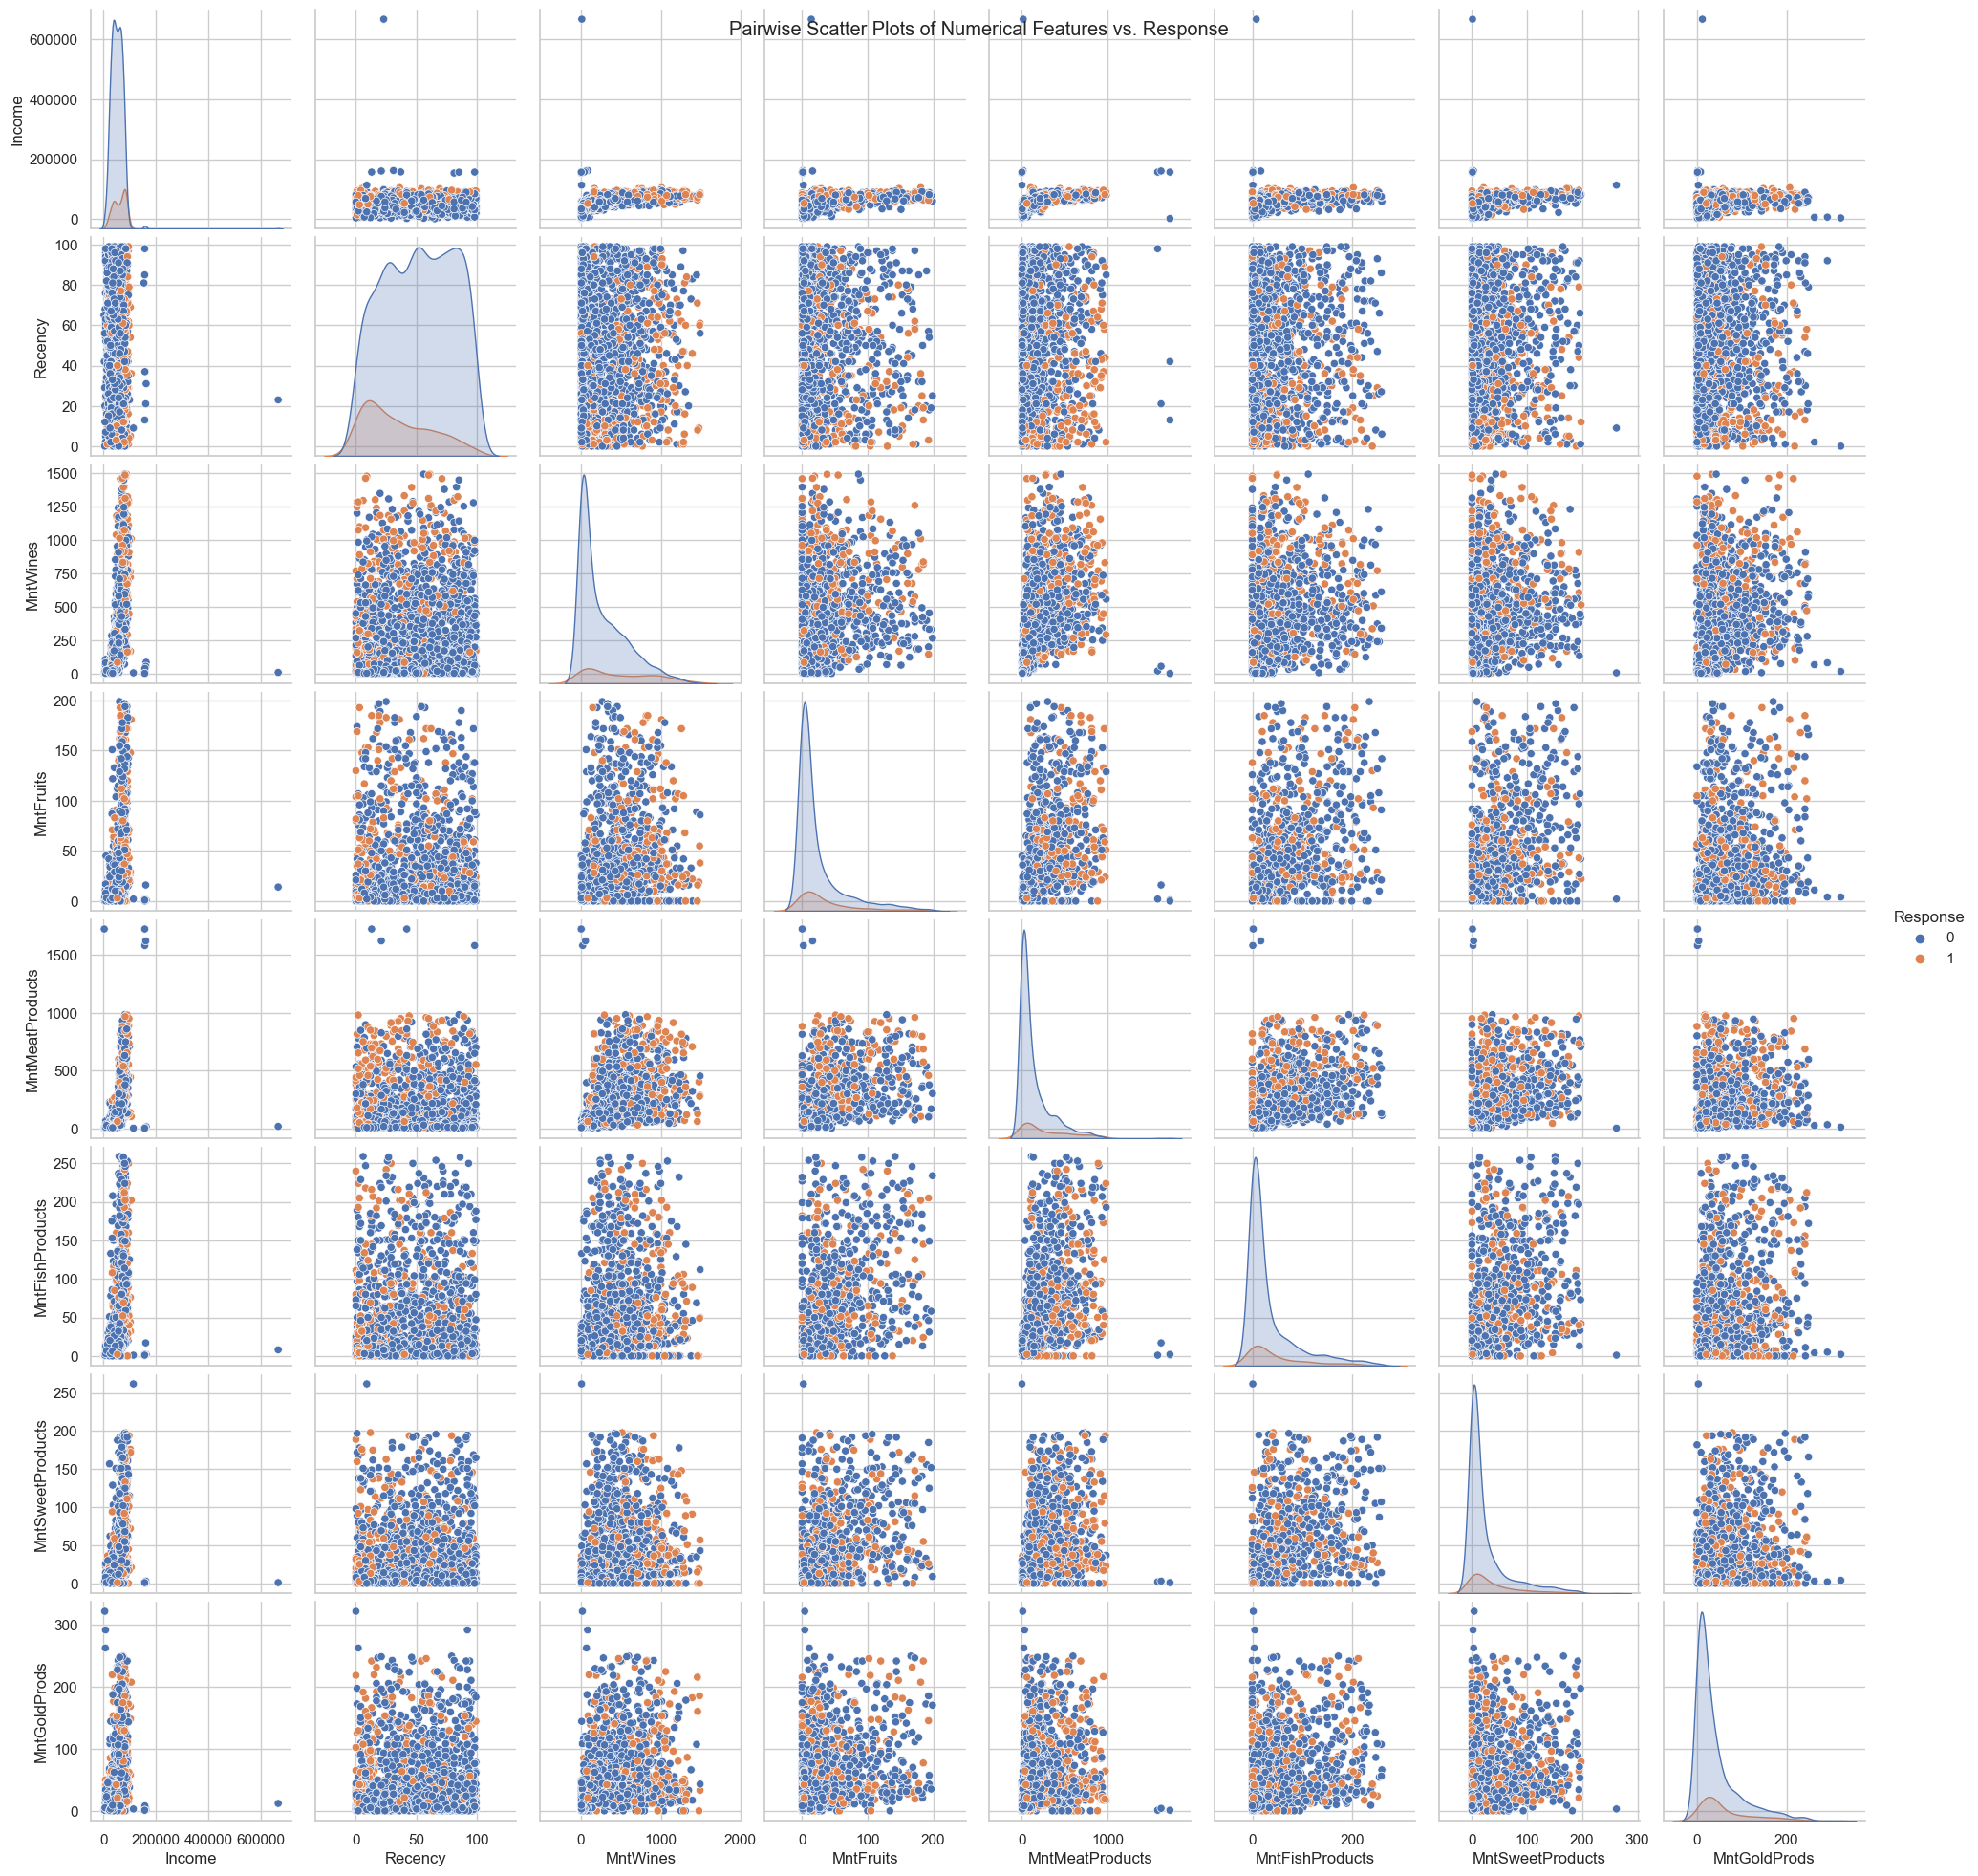

In [22]:
numerical_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
sns.pairplot(data=customer_data, vars=numerical_features, hue='Response', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots of Numerical Features vs. Response')
plt.show()

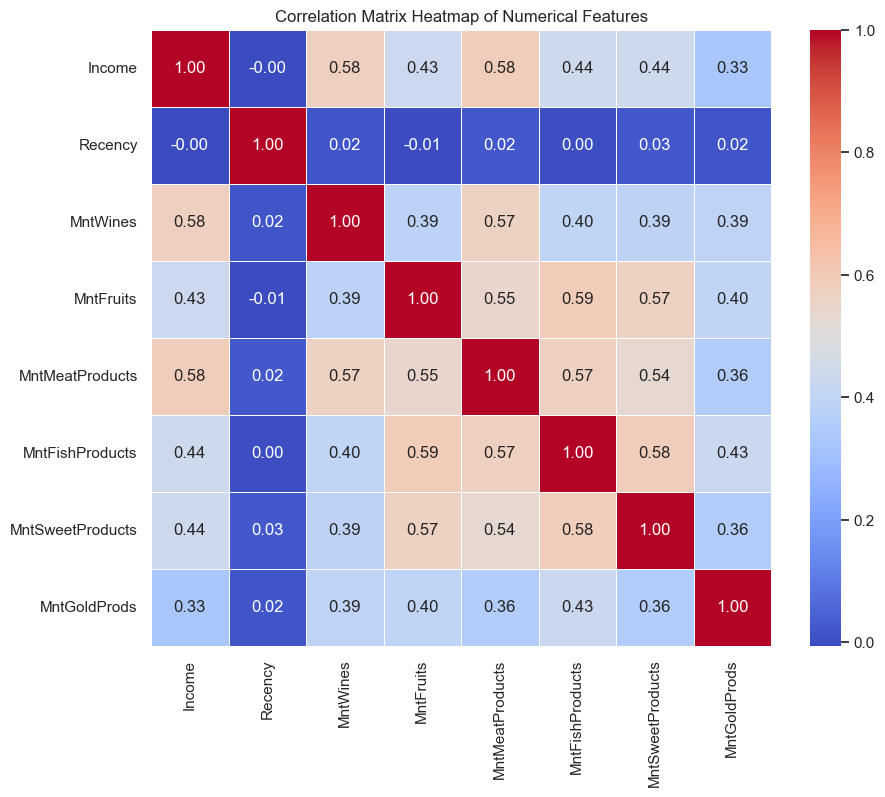

In [23]:
correlation_matrix = customer_data[numerical_features].corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.show()

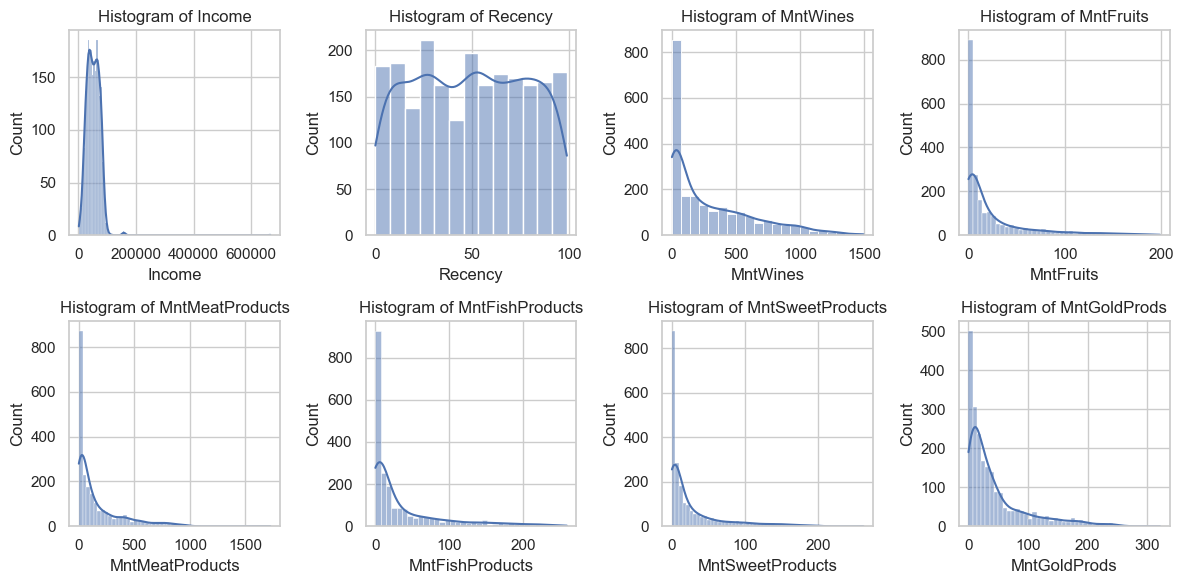

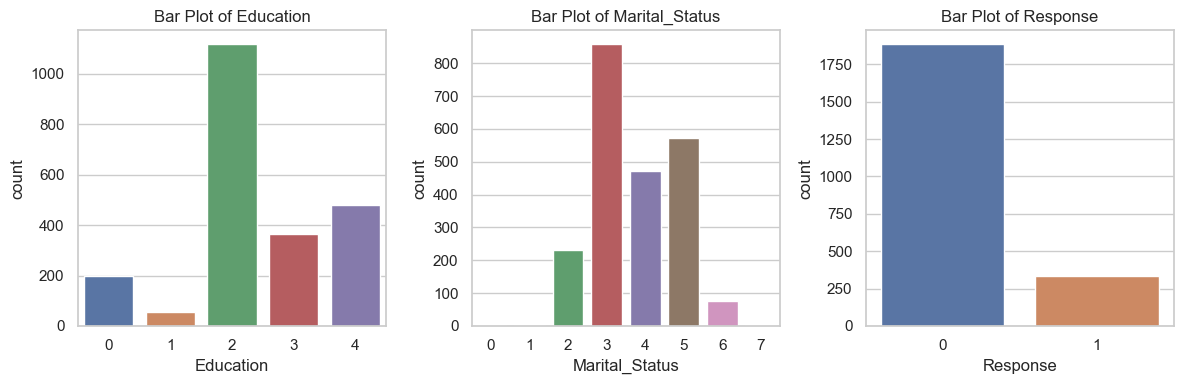

/Users/cristianchoco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

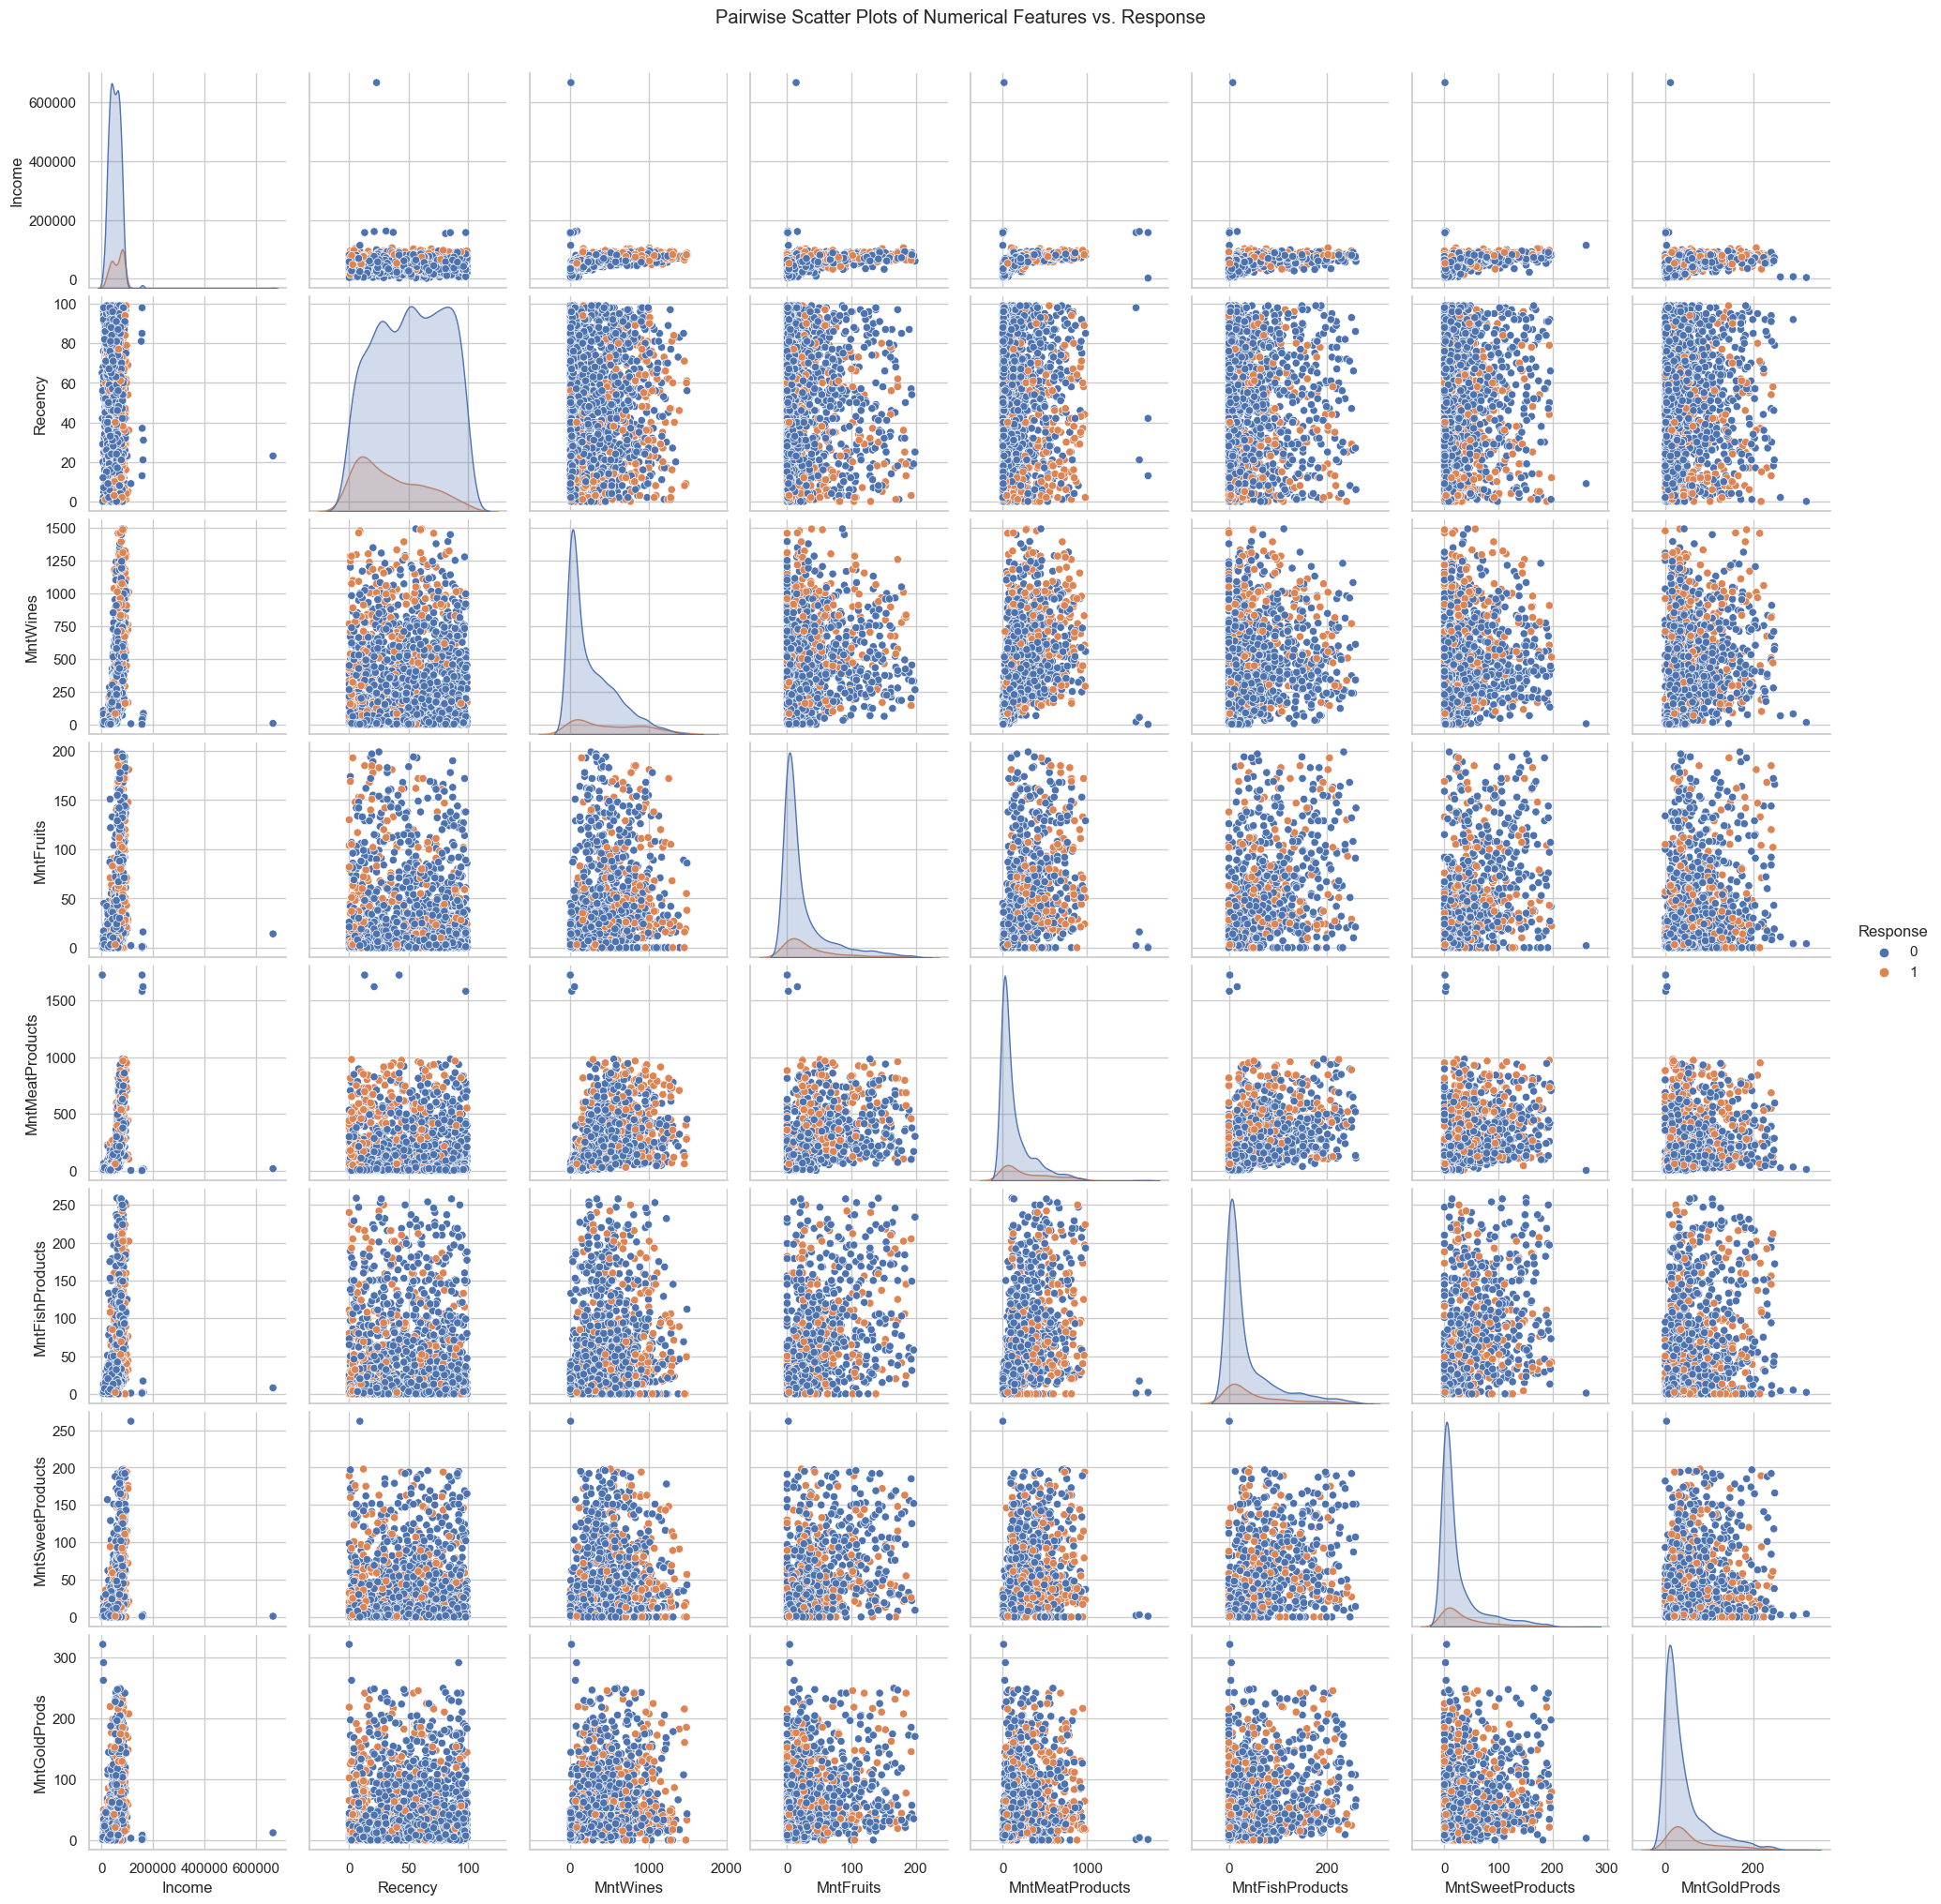

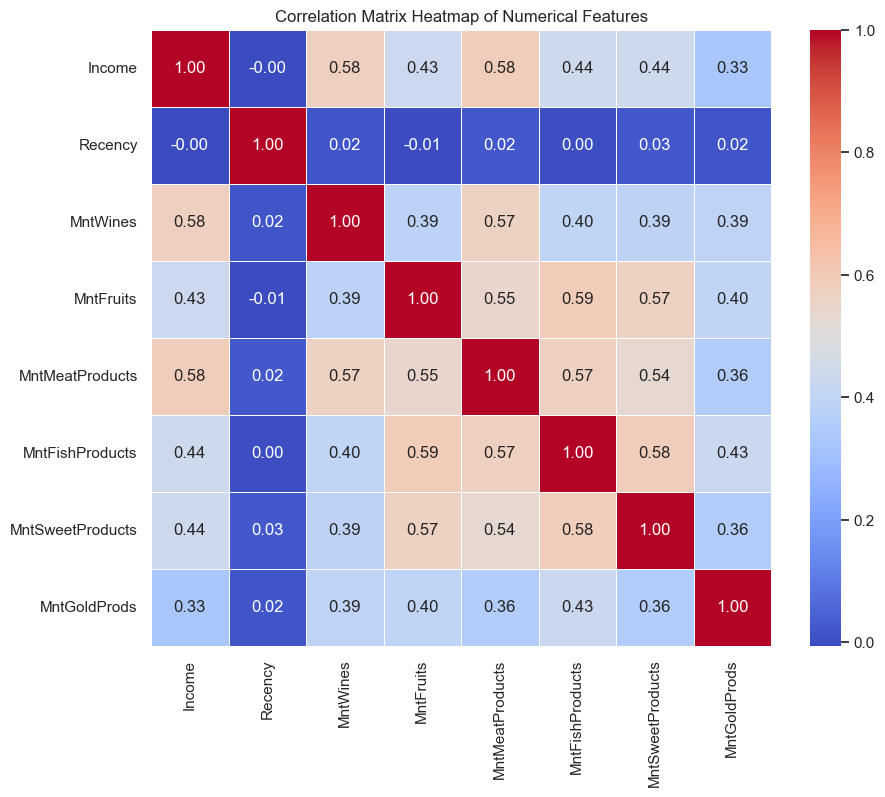

In [24]:
numerical_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data=customer_data, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Bar Plots for Categorical Features
categorical_features = ['Education', 'Marital_Status', 'Response']
plt.figure(figsize=(12, 4))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=customer_data, x=feature)
    plt.title(f'Bar Plot of {feature}')
plt.tight_layout()
plt.show()

# Scatter Plots
plt.figure(figsize=(12, 6))
sns.pairplot(data=customer_data, vars=numerical_features, hue='Response', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots of Numerical Features vs. Response', y=1.02)
plt.show()

# Correlation Matrix Heatmap
correlation_matrix = customer_data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.show()